In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#####labor
shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']

shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]

In [6]:
##### import GAMS results
#########Benchmark characteristics
##############################################################################
##############################################################################

t='_d2_v2'

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

#########Full Result characteristics
##############################################################################
##############################################################################

###set file for imports
t='_d2_v2'

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt0.csv'%t)
del pl_rpt0['file']

###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt0.csv'%t)
del pc_rpt0['file']

####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt0.csv'%t)
del y_rpt0['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt0.csv'%t)
del py_rpt0['file']

#########Producer Substitution Only characteristics
##############################################################################
##############################################################################

###set file for imports
t='_psubsonly'

##wages
pl_rptp=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt0.csv'%t)
del pl_rptp['file']

###consumer price index
pc_rptp=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt0.csv'%t)
del pc_rptp['file']

####output changes by sector 
y_rptp=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt0.csv'%t)
del y_rptp['file']

ys0_rptp=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rptp['file']

####output changes by sector 
py_rptp=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt0.csv'%t)
del py_rptp['file']

In [4]:
########run without producer substitution

Text(0, 0.5, 'Pct Change')

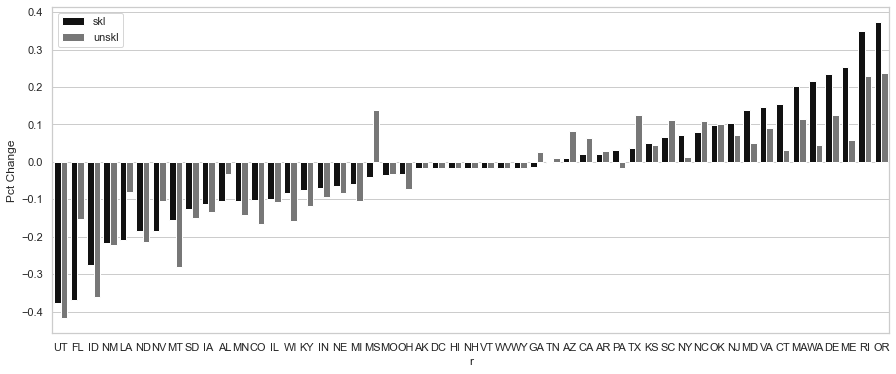

In [14]:
####plot labor endowment changes
fig, ax = plt.subplots(1, 1,figsize=(15,6))
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=shocks_lm,
    x="r", y='pct_shock',hue='sk',
   palette=['#111111','#777777']
)
plt.legend(loc='upper left')
plt.ylabel("Pct Change")
#g.legend.set_title("")

In [9]:
pl_rptp['pl_diffp'].max()

0.6944666709254701

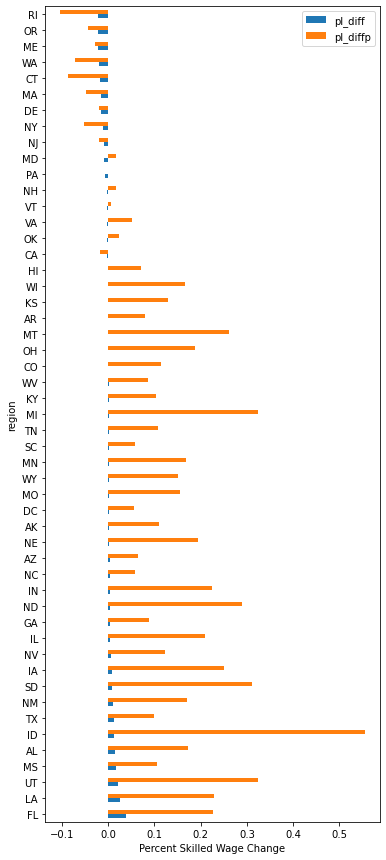

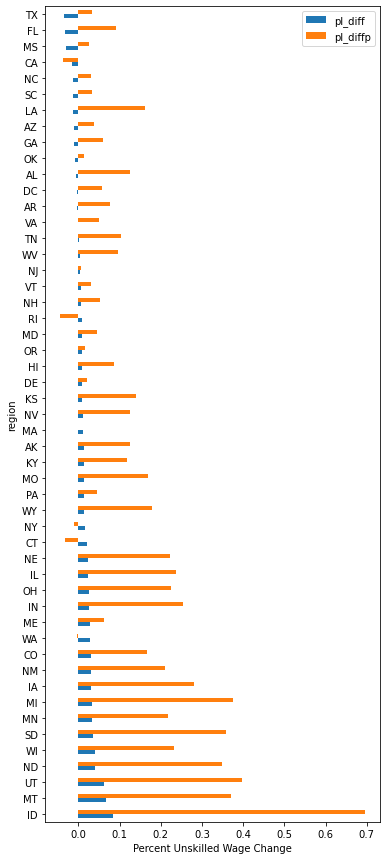

In [7]:
####plot horizontal par chart of wage changes by skill type
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1
pl_rptp['pl_diffp']=pl_rptp['pl_shock0']-1

pl_rpt_m=pl_rpt0.merge(pl_rptp,on=['region','skill'])[['region','skill','pl_diff','pl_diffp']]

for skl,lab in zip(['skl','unskl'],['Skilled','Unskilled']):
    
    fig, ax = plt.subplots(1, 1,figsize=(6,15))
    
    pl_rpt_m_lm=pl_rpt_m[pl_rpt_m['skill']==skl][['region','pl_diff','pl_diffp']]
    
    pl_rpt_m_lm=pl_rpt_m_lm.sort_values(by='pl_diff',ascending=False)

    pl_rpt_m_lm.set_index('region').plot(kind='barh',ax=ax)
    plt.xlabel('Percent %s Wage Change'%lab)
#     plt.legend(labels=['sk l','unsk l','capital','int good'])

In [ ]:
####plot horizontal par chart of wage changes by skill type
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1

for skl,lab in zip(['skl','unskl'],['Skilled','Unskilled']):
    
    fig, ax = plt.subplots(1, 1,figsize=(6,15))
    
    pl_rpt0_lm=pl_rpt0[pl_rpt0['skill']==skl][['region','pl_diff']]
    pl_rpt0_lm=pl_rpt0_lm.sort_values(by='pl_diff',ascending=False)

    pl_rpt0_lm.set_index('region').plot(kind='barh',ax=ax)
    plt.xlabel('Percent %s Wage Change'%lab)
#     plt.legend(labels=['sk l','unsk l','capital','int good'])

Text(0, 0.5, 'Pct Change Nominal Wage')

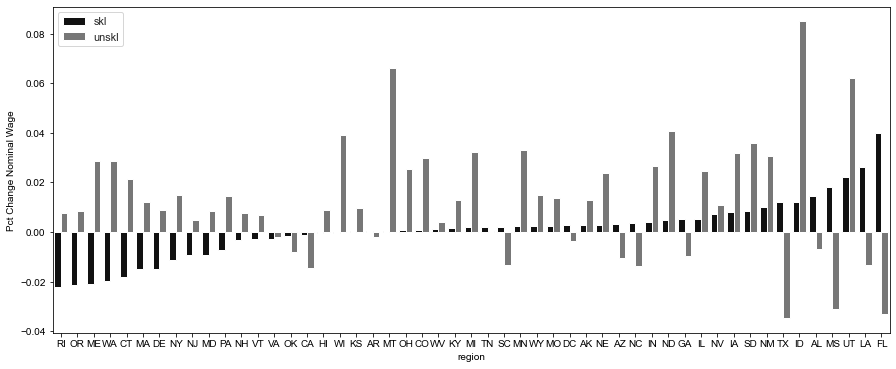

In [13]:


fig, ax = plt.subplots(1, 1,figsize=(15,6))
pl_rpt0=pl_rpt0.sort_values(by=['skill','pl_diff'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=pl_rpt0,
    x="region", y='pl_diff',hue='skill',
   palette=['#111111','#777777']
)

plt.legend(loc='upper left')
plt.ylabel("Pct Change Nominal Wage")
#g.legend.set_title("")

In [17]:
labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]
labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


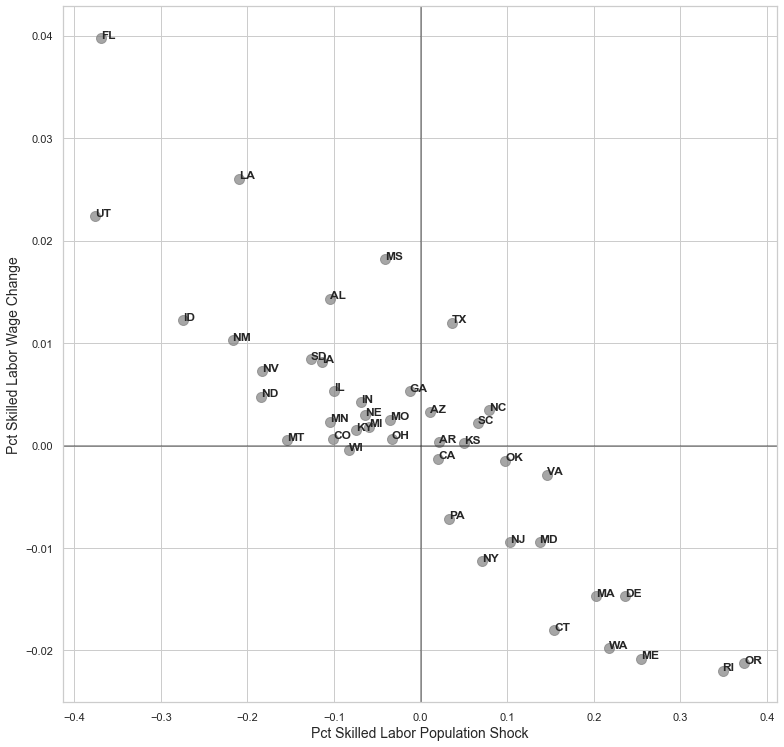

In [25]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'pct_shock_skl','wage_diff_skl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Skilled Labor Population Shock',fontsize=14)
plt.ylabel('Pct Skilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_skl.iat[i],labor_wage_pvt.wage_diff_skl.iat[i]),fontsize=12,weight='bold')
plt.show()



    

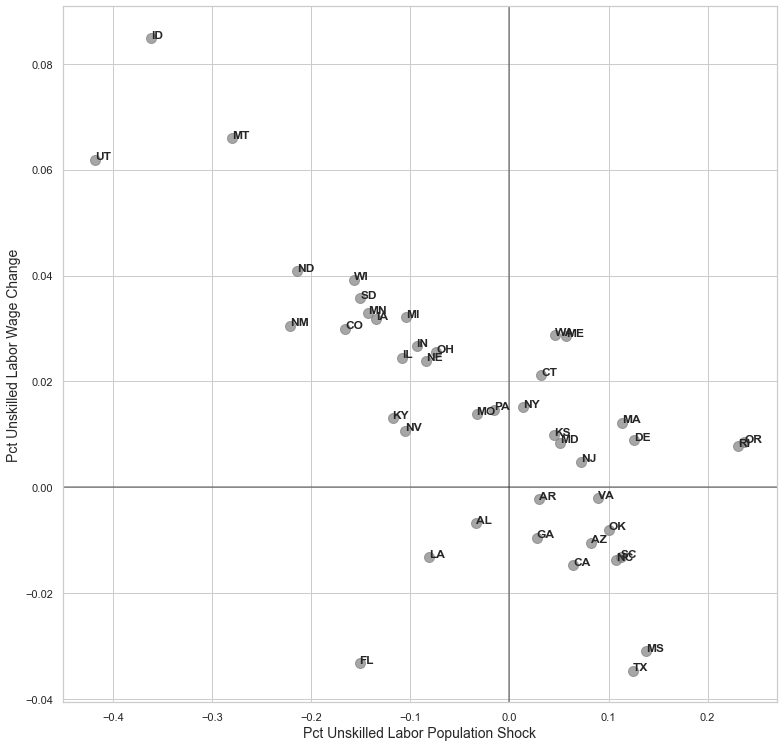

In [26]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'pct_shock_unskl','wage_diff_unskl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Unskilled Labor Population Shock',fontsize=14)
plt.ylabel('Pct Unskilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_unskl.iat[i],labor_wage_pvt.wage_diff_unskl.iat[i]),fontsize=12,weight='bold')
plt.show()

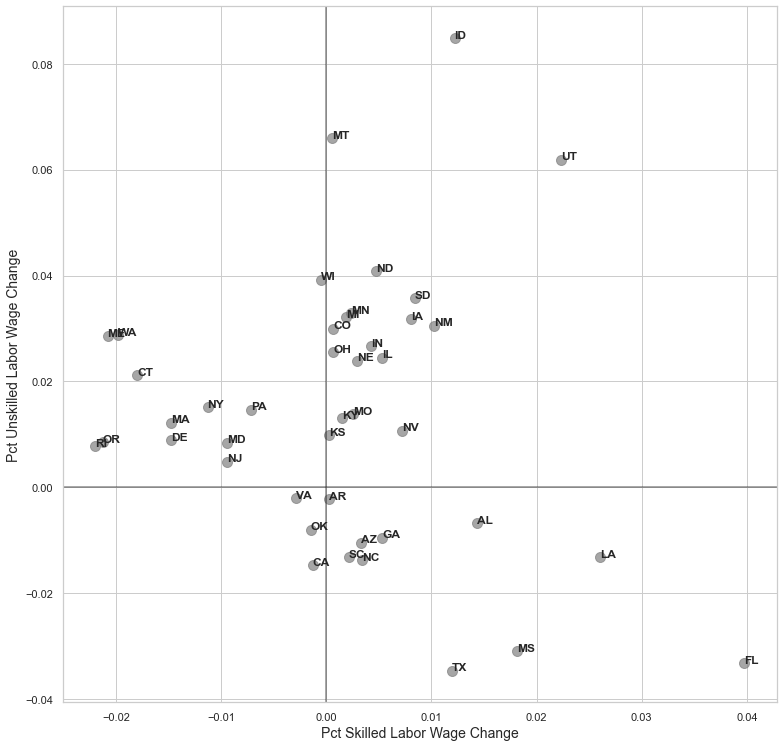

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'wage_diff_skl','wage_diff_unskl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Skilled Labor Wage Change',fontsize=14)
plt.ylabel('Pct Unskilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.wage_diff_skl.iat[i],labor_wage_pvt.wage_diff_unskl.iat[i]),fontsize=12,weight='bold')
plt.show()

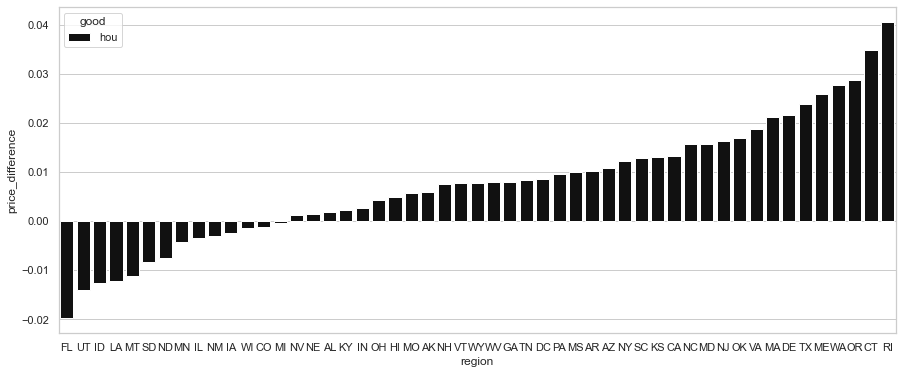

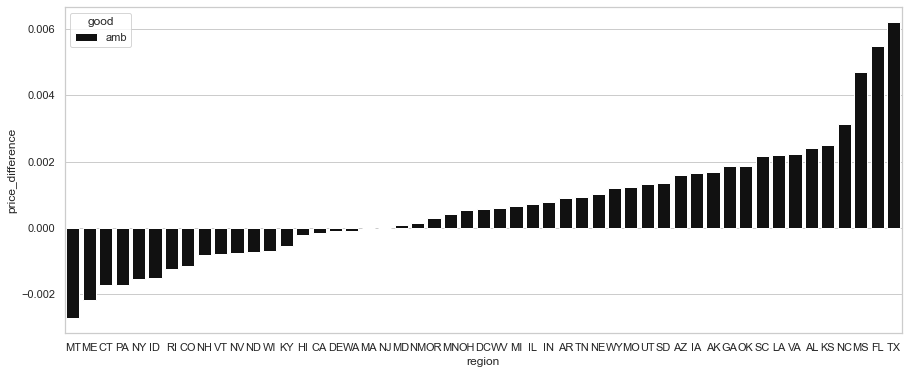

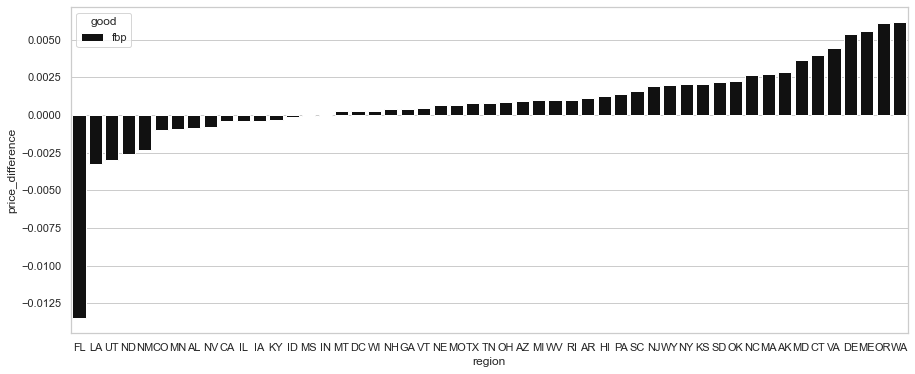

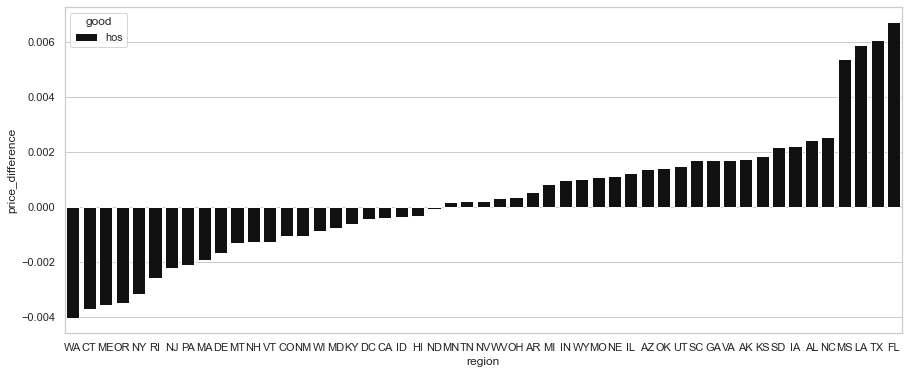

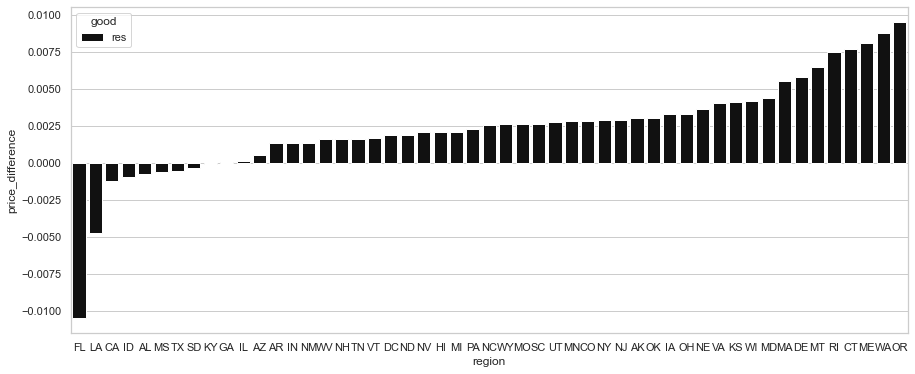

In [34]:
for g in ['hou','amb','fbp','hos','res',]:
    change_in_py=py_rpt0[py_rpt0['good']==g]
    change_in_py['price_difference']=change_in_py['py0']-1

    fig, ax = plt.subplots(1, 1,figsize=(15,6))
    change_in_py=change_in_py.sort_values(by=['price_difference'],ascending=True).reset_index()

    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=change_in_py,
        x="region", y='price_difference',hue='good',
       palette=['#111111']
    )